In [ ]:
import os
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [6]:
import networkx as nx

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(1, 4), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6)])

# Define two modules (subsets of nodes)
module1 = {1, 2, 3}
module2 = {4, 5, 6}

# Calculate Jaccard index for interaction strength
def jaccard_similarity(G, module1, module2):
    # Compute neighbors of nodes in each module
    neighbors_module1 = set()
    neighbors_module2 = set()
    for node in module1:
        neighbors_module1.update(G.neighbors(node))
    for node in module2:
        neighbors_module2.update(G.neighbors(node))

    # Calculate Jaccard index
    intersection = len(neighbors_module1.intersection(neighbors_module2))
    union = len(neighbors_module1.union(neighbors_module2))
    jaccard_index = intersection / union

    return jaccard_index

interaction_strength = 1 - jaccard_similarity(G, module1, module2)
print(f"Jaccard Index for Interaction Strength: {interaction_strength:.2f}")

Jaccard Index for Interaction Strength: 1.00


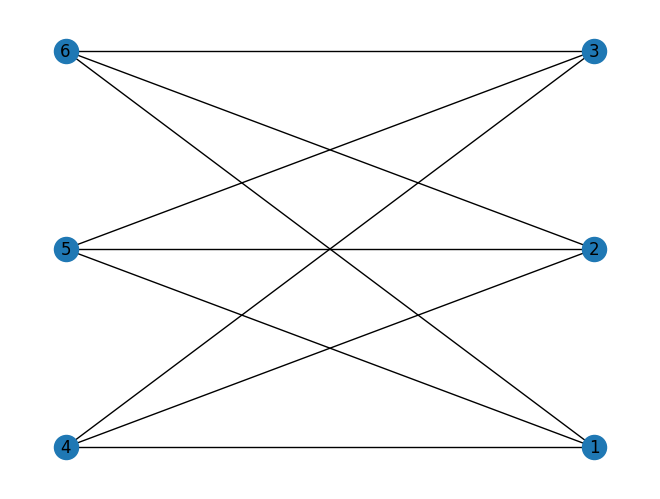

In [17]:
nx.draw(G, with_labels = True, pos = nx.drawing.layout.bipartite_layout(module1, module2))

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
cd drive

/content/drive


In [ ]:
cd MyDrive

/content/drive/MyDrive


In [ ]:
cd XBBvariants/

/content/drive/MyDrive/XBBvariants


In [ ]:
import plotly.io as pio
dpi = 600
format = ".tif"
width = 3.0
height = 1.5
scale = 6
text_color = "black"

In [ ]:
cwd = os.getcwd()
cwd

'/content/drive/MyDrive/XBBvariants'

In [ ]:
map_centralities_dict_names = {
                                cwd+"/Data/BC/Txt/": "betweenness_c",
                                cwd+"/Data/EC/Txt/": "eigenvector_c",
                                #cwd+"/Data/KC/Txt/": "katz_c",
                                cwd+"/Data/DC/Txt/": "degree_c",
                                cwd+"/Data/CC/Txt/": "closeness_c"
                                }

In [ ]:
spike_muts_variants = {
                        "XBB.1": np.array([19, 24, 83, 142, 146, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969]),
                        "XBB.1.9.1": np.array([19, 24, 83, 142, 146, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 486, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969]),
                       "XBB.2.3": np.array([19, 24, 83, 142, 146, 183, 213, 253, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 486, 490, 498, 501, 505, 521, 614, 655, 679, 681, 764, 796, 954, 969]),
                       "XBB.1.5": np.array([19, 24, 83, 142, 146, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 486, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969]),
                       "XBB.1.16": np.array([19, 24, 83, 142, 146, 180, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                              460, 477, 478, 484, 486, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969]),
                       "EG.5.1": np.array([19, 24, 52, 83, 142, 146, 180, 183, 213, 252, 339, 346, 368, 371, 373, 375, 376, 405, 408, 417, 440, 445, 446,
                                            456, 460, 477, 478, 484, 486, 490, 498, 501, 505, 614, 655, 679, 681, 764, 796, 954, 969])
                      }
centralities_supported = [cwd+"/Data/EC/Txt/", cwd+"/Data/DC/Txt/", cwd+"/Data/CC/Txt/", cwd+"/Data/BC/Txt/"] #,cwd+"/Data/KC/Txt/"

In [ ]:
community_algorithm = "Louvain"
communities_dir = cwd+"/Data/louvain/Communities/"

In [ ]:
th_min = 4.0
th_max = 8.0

In [ ]:
def dict_from_txt(file):

    import ast
    import glob

    for file in glob.glob(filename):

        with open(file) as f:
            data = f.read()
            d = ast.literal_eval(data)
            return d

In [ ]:
def find_mutated(dictionary, mutations):

    data = {}
    resis = [int(key.split()[0][3:]) for key in dictionary.keys()]
    map_residues = {int(key.split()[0][3:]): key for key in dictionary.keys()}

    for mut in mutations:
        if mut in resis:
            resi = map_residues[mut]
            data[resi] = "Community {}".format(dictionary[resi])
        else:
            data[mut] = "UM"
    return data


In [ ]:
def count_dict_values(dictionary):
    from collections import Counter
    return dict(Counter(dictionary.values()))

In [ ]:
conformations = ["closed", "open", "complex"]

In [ ]:
communities_all = {}
mutated_all = {}
count_mutations_in_communities = {}

for i, (spike_name, mutations) in enumerate(spike_muts_variants.items()):
  count_mutations_in_communities[spike_name] = {}
  mutated_all[spike_name] = {}
  communities_all[spike_name] = {}
  for conformation in conformations:
    filename =communities_dir+"{}_{}_Communities_louvain_ncoms*.txt".format(spike_name, conformation)
    print(filename)
    communities = dict_from_txt(filename)
    if communities is None:
      raise Exception("File not found")
    communities_all[spike_name][conformation] = communities
    print(communities)
    mutated = find_mutated(communities, mutations)
    mutated_all[spike_name][conformation] = mutated
    count_mutations_in_communities[spike_name][conformation] = count_dict_values(mutated)

/content/drive/MyDrive/XBBvariants/Data/louvain/Communities/XBB.1_closed_Communities_louvain_ncoms*.txt
{'ASN20 A': 1.0, 'LEU21 A': 1.0, 'ILE22 A': 1.0, 'THR23 A': 1.0, 'ARG24 A': 1.0, 'THR25 A': 1.0, 'GLN26 A': 1.0, 'SER27 A': 1.0, 'TYR28 A': 1.0, 'THR29 A': 1.0, 'ASN30 A': 1.0, 'SER31 A': 1.0, 'PHE32 A': 1.0, 'THR33 A': 1.0, 'ARG34 A': 1.0, 'GLY35 A': 1.0, 'VAL36 A': 1.0, 'TYR37 A': 1.0, 'TYR38 A': 1.0, 'PRO39 A': 1.0, 'ASP40 A': 1.0, 'LYS41 A': 11.0, 'VAL42 A': 7.0, 'PHE43 A': 11.0, 'ARG44 A': 1.0, 'SER45 A': 1.0, 'SER46 A': 1.0, 'VAL47 A': 1.0, 'LEU48 A': 1.0, 'HIS49 A': 1.0, 'SER50 A': 1.0, 'THR51 A': 1.0, 'GLN52 A': 1.0, 'ASP53 A': 1.0, 'LEU54 A': 1.0, 'PHE55 A': 1.0, 'LEU56 A': 1.0, 'PRO57 A': 1.0, 'PHE58 A': 1.0, 'PHE59 A': 1.0, 'SER60 A': 1.0, 'ASN61 A': 1.0, 'VAL62 A': 1.0, 'THR63 A': 1.0, 'TRP64 A': 1.0, 'PHE65 A': 1.0, 'HIS66 A': 1.0, 'ALA67 A': 1.0, 'ILE68 A': 1.0, 'HIS69 A': 1.0, 'ASP80 A': 1.0, 'ASN81 A': 1.0, 'PRO82 A': 1.0, 'ALA83 A': 1.0, 'LEU84 A': 1.0, 'PRO85 A': 1.

In [ ]:
count_mutations_in_communities["XBB.1"]

{'closed': {'Community 4.0': 1,
  'Community 3.0': 4,
  'UM': 5,
  'Community 7.0': 20,
  'Community 9.0': 1,
  'Community 15.0': 2,
  'Community 14.0': 3,
  'Community 6.0': 1},
 'open': {'UM': 7,
  'Community 19.0': 1,
  'Community 6.0': 2,
  'Community 7.0': 18,
  'Community 2.0': 3,
  'Community 12.0': 2,
  'Community 14.0': 3,
  'Community 0.0': 1},
 'complex': {'Community 1.0': 1,
  'Community 15.0': 3,
  'Community 0.0': 16,
  'Community 6.0': 10,
  'Community 17.0': 1,
  'UM': 2,
  'Community 4.0': 3,
  'Community 11.0': 1}}

In [ ]:
spikes = list(spike_muts_variants.keys())
spikes

['XBB.1', 'XBB.1.9.1', 'XBB.2.3', 'XBB.1.5', 'XBB.1.16', 'EG.5.1']

In [ ]:
import pandas as pd
columns = ["variant",  "n°. communities", "n°. mutations", "mutations for each comminity"]
n = len(spikes)
values = np.zeros((n, 4), dtype="<U11111111")
for i, (variant, c) in enumerate(communities_all.items()):
    for conformation, communities, in c.items():
        values[i][0] = variant+"_"+conformation
        values[i][1] = len(list(np.unique(list(communities.values()))))
        values[i][2] = len(list(spike_muts_variants[variant]))
        values[i][3] = count_mutations_in_communities[variant][conformation]
values

array([['XBB.1_complex', '22', '37',
        "{'Community 1.0': 1, 'Community 15.0': 3, 'Community 0.0': 16, 'Community 6.0': 10, 'Community 17.0': 1, 'UM': 2, 'Community 4.0': 3, 'Community 11.0': 1}"],
       ['XBB.1.9.1_complex', '18', '38',
        "{'Community 1.0': 1, 'Community 0.0': 13, 'Community 2.0': 17, 'Community 10.0': 1, 'UM': 2, 'Community 13.0': 1, 'Community 7.0': 2, 'Community 14.0': 1}"],
       ['XBB.2.3_complex', '22', '39',
        "{'Community 1.0': 1, 'Community 20.0': 2, 'Community 0.0': 19, 'Community 6.0': 10, 'Community 15.0': 1, 'UM': 2, 'Community 11.0': 3, 'Community 3.0': 1}"],
       ['XBB.1.5_complex', '23', '38',
        "{'Community 0.0': 1, 'Community 6.0': 8, 'Community 11.0': 11, 'Community 1.0': 11, 'Community 16.0': 1, 'UM': 2, 'Community 4.0': 3, 'Community 22.0': 1}"],
       ['XBB.1.16_complex', '19', '39',
        "{'Community 4.0': 1, 'Community 3.0': 13, 'Community 1.0': 18, 'Community 15.0': 1, 'UM': 2, 'Community 11.0': 3, 'Community 5.

In [ ]:
df = pd.DataFrame(values, columns=columns)
df = df.set_index("variant")
df

,n°. communities,n°. mutations,mutations for each comminity
variant,,,
XBB.1_complex,22,37,"{'Community 1.0': 1, 'Community 15.0': 3, 'Com..."
XBB.1.9.1_complex,18,38,"{'Community 1.0': 1, 'Community 0.0': 13, 'Com..."
XBB.2.3_complex,22,39,"{'Community 1.0': 1, 'Community 20.0': 2, 'Com..."
XBB.1.5_complex,23,38,"{'Community 0.0': 1, 'Community 6.0': 8, 'Comm..."
XBB.1.16_complex,19,39,"{'Community 4.0': 1, 'Community 3.0': 13, 'Com..."
EG.5.1_complex,21,41,"{'Community 12.0': 1, 'Community 0.0': 14, 'Co..."


In [ ]:
df.to_csv("Data\communities_report.csv")

In [ ]:
import matplotlib.pyplot as plt
def color_map_clustering(clusters, variant, domain = None, domain_residues = None):
    """
    Clustering color map plot
    """
    n = len(clusters)
    cluster_map = np.zeros((n,n), dtype = int)
    labels_unique, counts = np.unique(clusters, return_counts=True)

    for i, label in enumerate(clusters):
        for j, label2 in enumerate(clusters):
            if ((cluster_map[i][j] == 0) and (label==label2)):
                cluster_map[i][j] = label+1

    plt.figure(figsize=(8,8))
    plt.matshow(cluster_map, vmin=0, vmax=max(clusters)+1, cmap='inferno', fignum=1)
    if domain_residues is not None:
        plt.xticks(np.arange(0, n, 50),  [domain_residues[i] for i in range(0, n, 50)], rotation=90)
        plt.yticks(np.arange(0, n, 50),  [domain_residues[i] for i in range(0, n, 50)])
    plt.legend(labels=labels_unique)
    if isinstance(domain, str):
        plt.savefig('Figures\Communities_map\{}_{}.png'.format(variant, domain))
    else:
        plt.savefig('Figures\Communities_map\{}.png'.format(variant))
    plt.show()

In [ ]:
for variant, communities in communities_all.items():
    color_map_clustering(communities.values(), variant)

TypeError: ignored

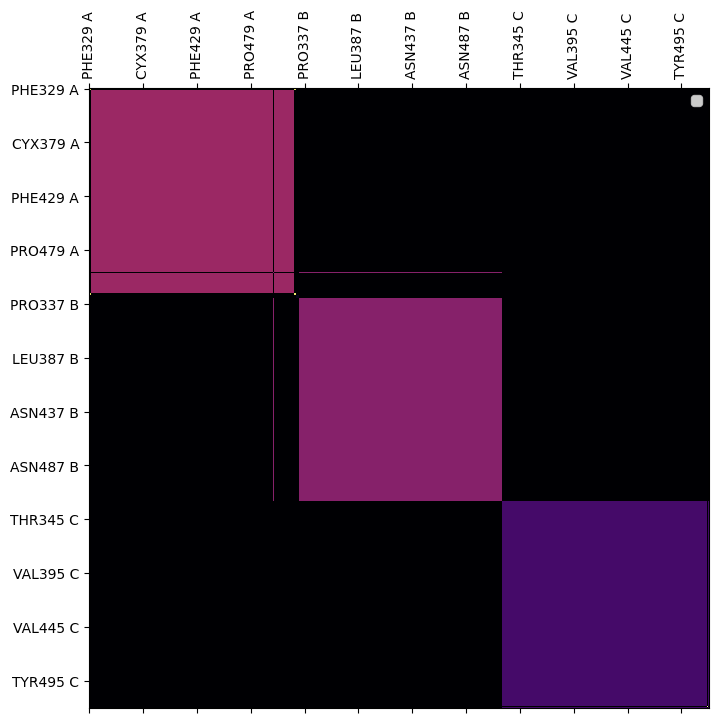

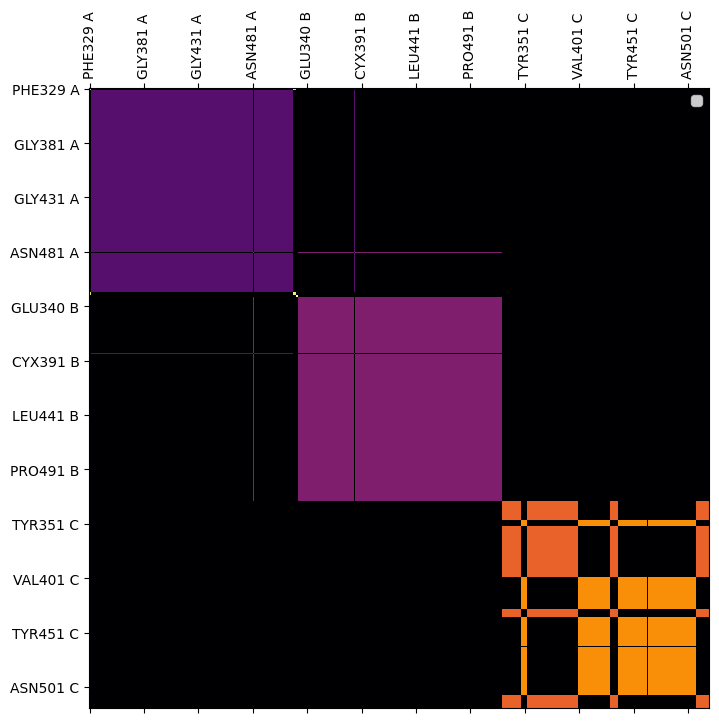

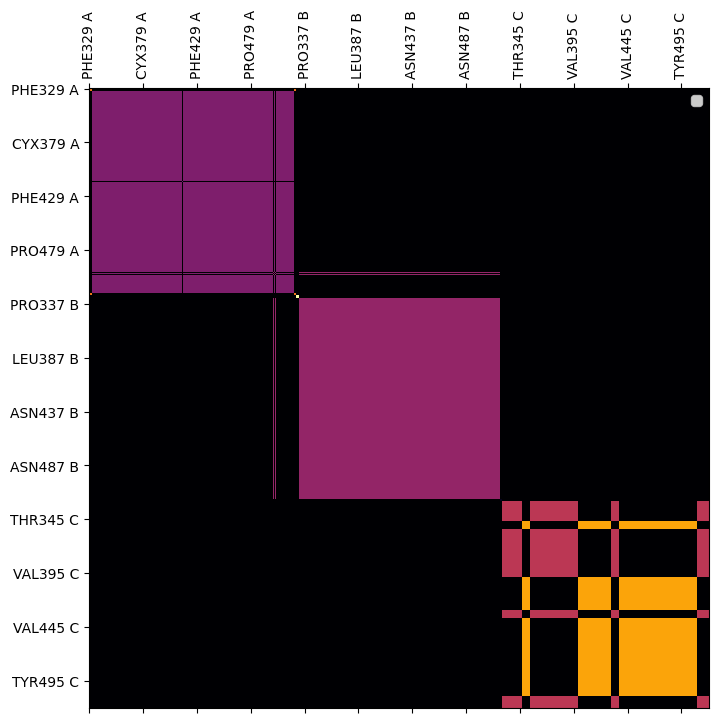

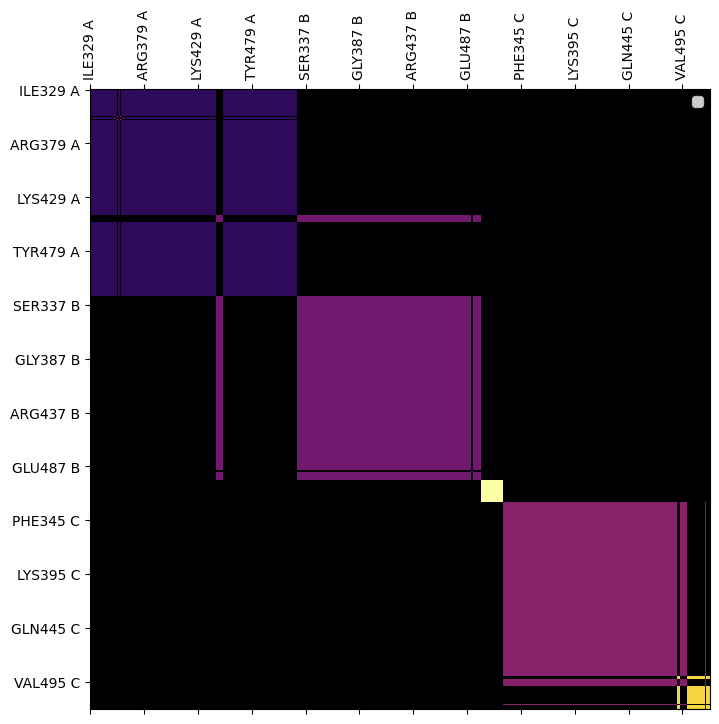

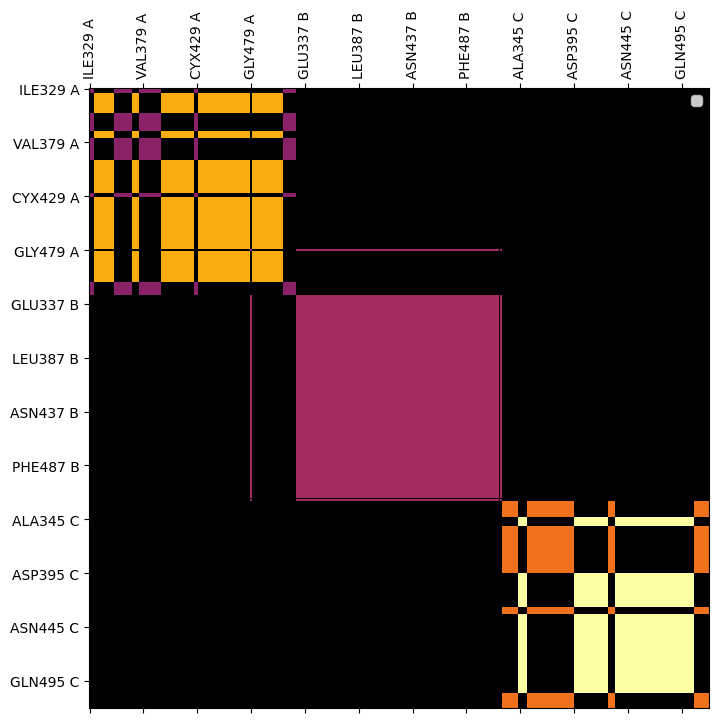

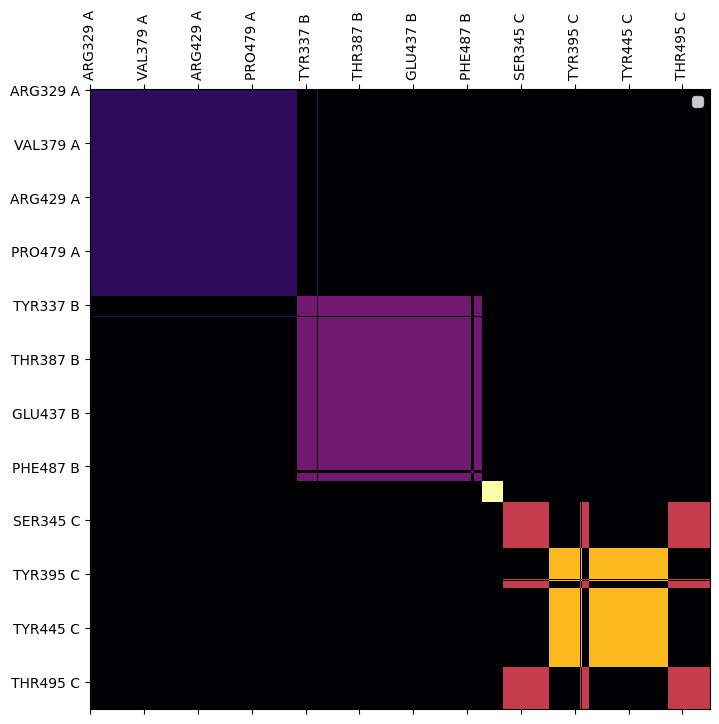

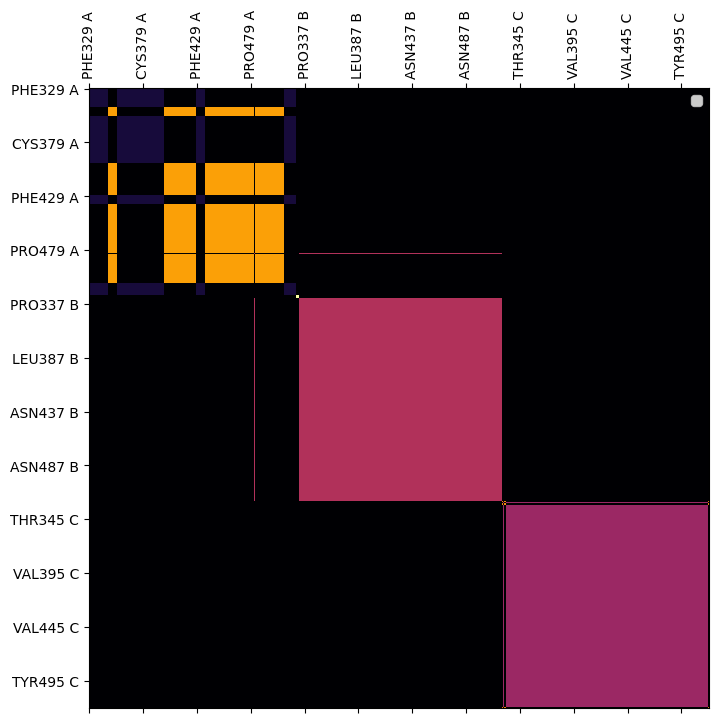

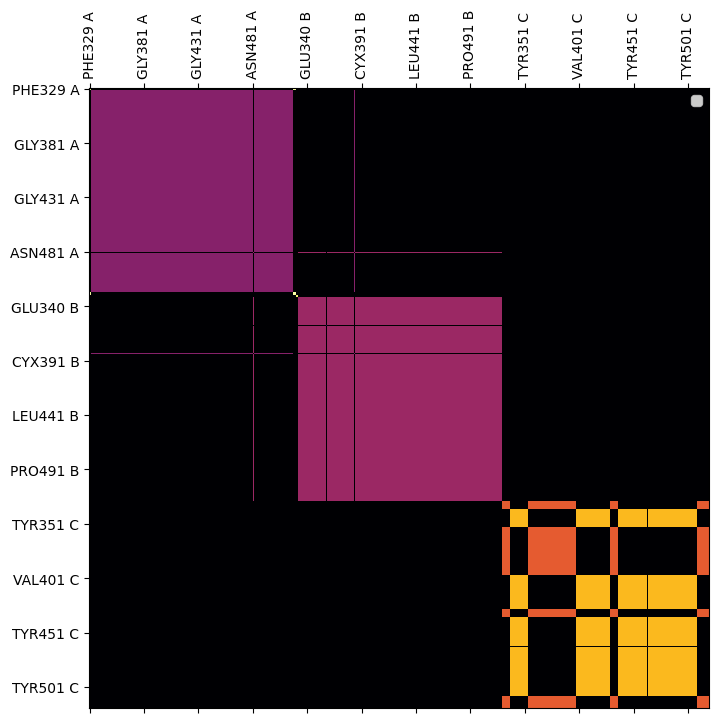

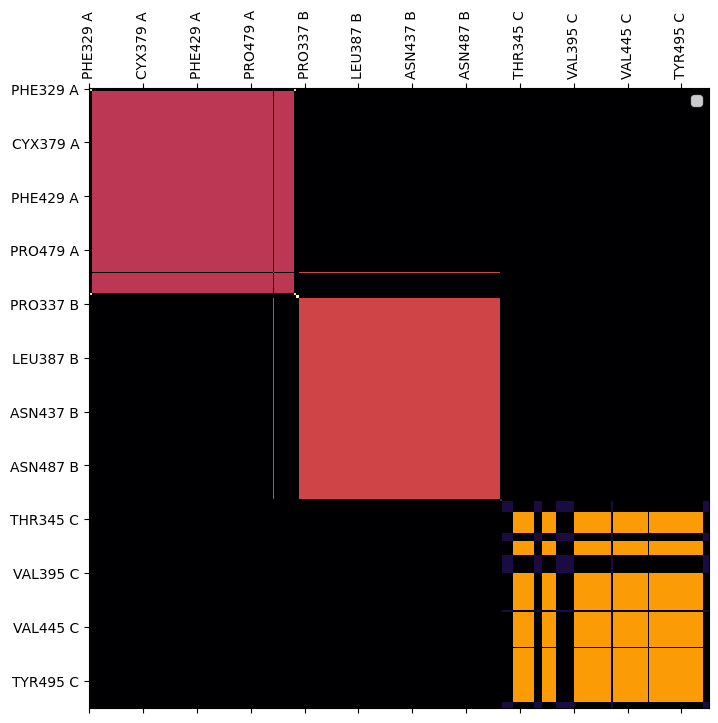

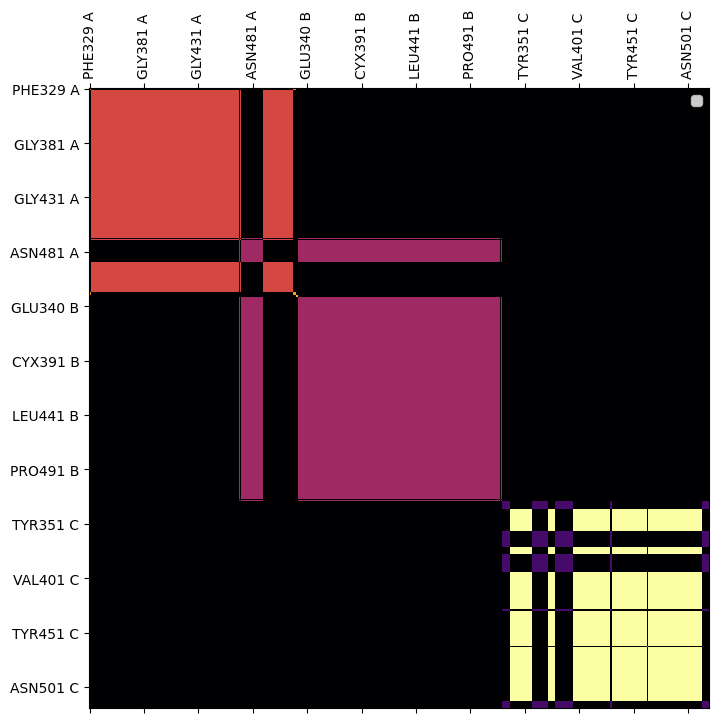

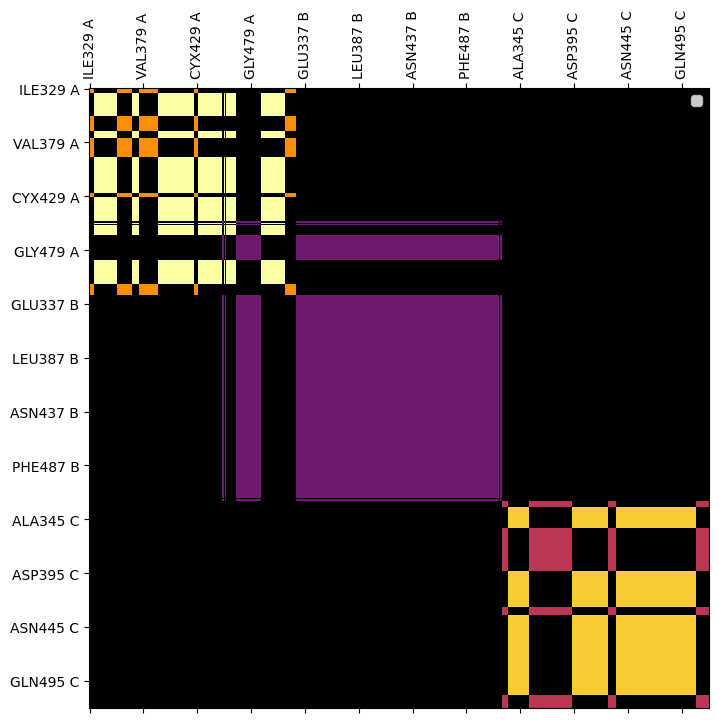

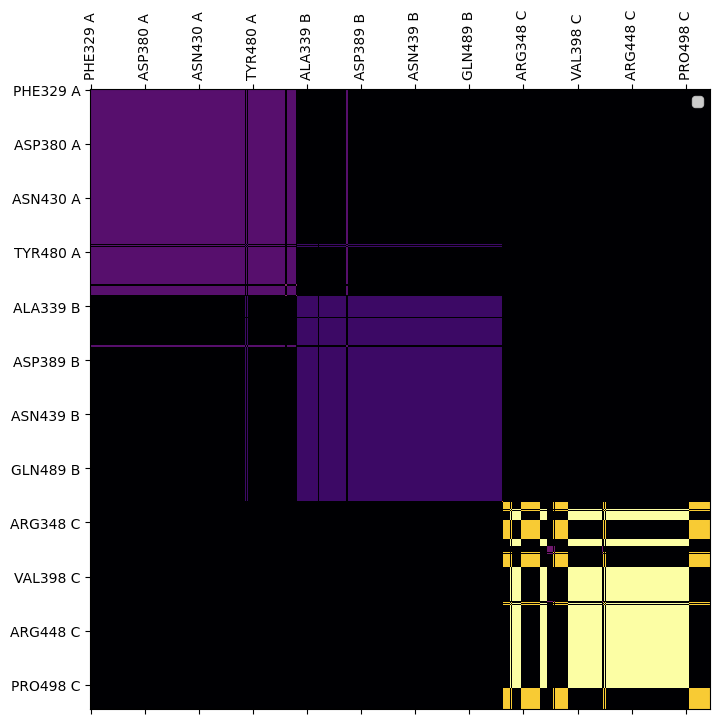

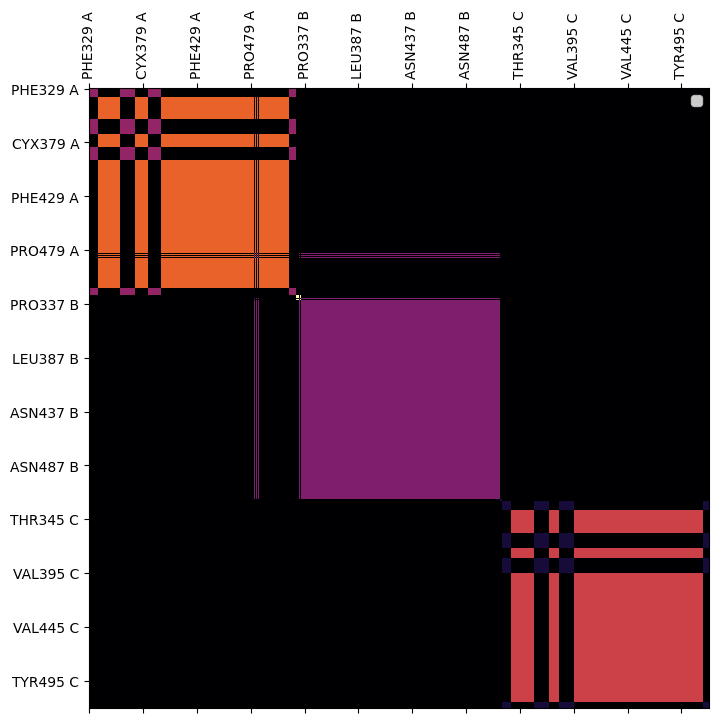

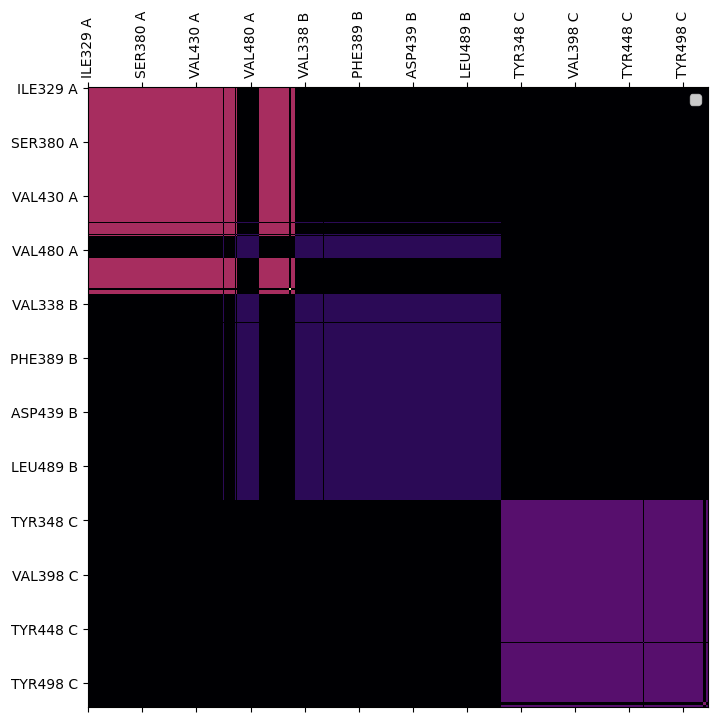

In [ ]:
rbd = np.arange(329, 521, 1)
for variant, communities in communities_all.items():
    rbd_communities = {residue: value for residue, value in communities.items() if int(residue.split()[0][3:]) in rbd}
    color_map_clustering(rbd_communities.values(), variant, "rbd", list(rbd_communities.keys()))

In [ ]:
def plot_centrality_hist(centrality_dict, centrality_name):
    #plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(centrality_dict.keys()), y=list(centrality_dict.values()),
                marker_color='green',
                name=centrality_name,
                fill='tozeroy'
        )
    )
    fig.update_layout(xaxis =  {'showgrid': False}, yaxis = { 'showgrid': False }, plot_bgcolor='rgba(0,0,0,0)')
    return fig

In [ ]:
hists_figures = {}
for i, variant in enumerate(spike_muts_variants.keys()):
    hists_figures[variant] = {}
    for directory, centralityname in map_centralities_dict_names.items():
      hists_figures[variant][centralityname] = {}
      for conformation in conformations:
        filename = "{}{}_{}_{}.txt".format(directory, variant, conformation, centralityname)
        centrality_dict = dict_from_txt(filename)
        print(filename)
        print(centrality_dict)
        fig = plot_centrality_hist(centrality_dict, centralityname)
        hists_figures[variant][centralityname][conformation] = fig
        #fig.write_image("Figures\Centralities\{}\{}_{}_areaplot.png".format(directory.split("/")[1], centralityname, variant))
        #fig.write_html("Figures\Centralities\{}\{}_{}_areaplot.html".format(directory.split("/")[1], centralityname, variant))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
hists_figures["EG.5.1"]["betweenness_c"]["complex"]

In [ ]:
hists_figures["EG.5.1"]["betweenness_c"]["closed"]

In [ ]:
def get_centrality_of_residues(residues, centrality_dict, centrality_name="Data\EC"):
    data = {}
    chains = ["A", "B", "C"]
    centrality_dict = {key[3:]: value for key, value in centrality_dict.items()}
    if isinstance(residues, int):
        residues = [residues]
    for residue in residues:
        if residue in [int(res.split()[0]) for res in centrality_dict.keys()]:
            for chain in chains:
                res = str(residue)+" "+chain
                data[res] = centrality_dict[res]
    return data

In [ ]:
get_centrality_of_residues([501, 417], ec_omi, centrality_name="Data\EC")

{'501 A': 5.868104437603269e-07,
 '501 B': 2.081567056200006e-08,
 '501 C': 4.672865623708352e-06,
 '417 A': 8.905271547268786e-07,
 '417 B': 1.18323902039296e-08,
 '417 C': 5.621493952044103e-06}

In [ ]:
def visualize_network(G, color_by = None, size_by = None, title = None, layout = "spring_layout", partition = None):
    """
  Layouts: [graphviz_layout, pydot_layout, bipartite_layout, circular_layout, kamada_kawai_layout, planar_layout, random_layout, rescale_layout,
            spring_layout, spectral_layout, spiral_layout, multipartite_layout, community_layout]
  Size_by: "color_by", None, List or "node_attribute" in G.nodes(data=True)
    """

    colors = ['blue', 'brown', 'chocolate', 'coral', 'crimson', 'cyan', 'darkblue', 'darkcyan',
             'darkgray', 'darkgrey', 'darkgreen',
             'darkmagenta', 'darkolivegreen', 'darkred', 'darksalmon', 'darkseagreen',
                'darkorange', 'darkviolet', 'deeppink', 'dodgerblue', 'firebrick',
                'fuchsia', 'gold', 'gray', 'grey', 'green',
                'hotpink', 'lemonchiffon', 'lightblue', 'lime', 'limegreen',
                'linen', 'magenta', 'maroon', 'orangered',
                'palegreen', 'pink', 'purple', 'red', 'salmon', 'sienna', 'silver', 'skyblue',
                'turquoise', 'violet', 'black', 'yellow',
                'yellowgreen']

    if title is None:
        title = "Plotly Networkx visualization"
    if color_by is not None:
        colorscale = "Jet_r"
        if color_by not in set(G.nodes(data=True)[list(G.nodes.keys())[0]].keys()):
            raise Exception("Attribute Error: '{}' not found in nodes attributes".format(color_by))
    else:
        colorscale = "Blues"
        if size_by == "color_by":
            size_by = color_by
        #colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |

    if partition is not None:
        layout == "community_layout"
    if layout is not None:
        if layout == "graphviz_layout":
            pos = nx.nx_pydot.graphviz_layout(G)
        elif layout == "pydot_layout":
            pos = nx.nx_pydot.pydot_layout(G)
        elif layout == "bipartite_layout":
            top = nx.bipartite.sets(G)[0]
            pos = nx.bipartite_layout(G, top)
        elif layout == "circular_layout":
            pos = nx.circular_layout(G)
        elif layout == "kamada_kawai_layout":
            pos = nx.kamada_kawai_layout(G)
        elif layout == "planar_layout":
            pos = nx.planar_layout(G)
        elif layout == "random_layout":
            pos = nx.random_layout(G)
        elif layout == "rescale_layout":
            pos = nx.rescale_layout(G)
        elif layout == "spring_layout":
            pos = nx.spring_layout(G)
        elif layout == "spectral_layout":
            pos = nx.spectral_layout(G)
        elif layout == "spiral_layout":
            pos = nx.spiral_layout(G)
        elif layout == "multipartite_layout":
            pos = nx.multipartite_layout(G)
        elif layout == "community_layout":
            if partition is not None:
                pos = community_layout(G, partition)
                colorscale = "Rainbow"
        elif isinstance(layout, dict):
            pos = layout


    if size_by is None:
        nx.set_node_attributes(G, pos, "pos")

    if color_by is not None:
        if partition is None:
            showscale = True
        else:
            showscale = False
    else:
        showscale = False

    if partition is None:

        node_color = []
        node_size = []
        for node, attributes in G.nodes(data=True):
            if color_by is not None:
                value = attributes[color_by]
            else:
                value = 0
            node_color.append(value)
            if size_by is not None:
                size = value*200
                if size < 6:
                    size = 6
                node_size.append(size)
            else:
                node_size.append(8)
            #node_trace.marker.color = node_color
        if size_by is not None:
            idx = np.argsort(np.array(node_color))
            nodes = list(G.nodes())
            nodes = np.array(nodes)[idx]
            H = nx.Graph()
            H.add_nodes_from(np.array(G.nodes(data=True))[idx])
            H.add_edges_from(G.edges(data=True))
            G = H
            node_color = np.array(node_color)[idx]
            node_size = np.array(node_size)[idx]
            pos = {list(pos.keys())[i]: list(pos.values())[i] for i in idx}
            nx.set_node_attributes(G, pos, "pos")
        nodes_text = []
        for node, attributes in G.nodes(data=True):
            node_text = "Node: {}\n\n".format(node)
            for attribute_name, value in dict(attributes).items():
                node_text += "{}: {}\n".format(attribute_name, value)
            nodes_text.append(node_text)
        if size_by is not None:
            nodes_text = np.array(nodes_text)[idx]
            line_width = 1
        else:
            line_width = 2
        node_x = []
        node_y = []
        for node in G.nodes():
            x, y = G.nodes[node]['pos']
            node_x.append(x)
            node_y.append(y)
        node_trace = go.Scatter(
            x=node_x, y=node_y,
            mode='markers',
            hoverinfo="name+text",
            marker = dict(
              showscale=showscale,
              colorscale=colorscale,
              reversescale=True,
              color=[],
              size=8,
              line_width=line_width,
              line_color="black",
              colorbar=dict(
                thickness=40,
                title=color_by,
                xanchor='left',
                titleside='right',
                tickfont_size=18
              ),
            )
          )

        node_trace.marker.size = node_size
        node_trace.marker.color = node_color
        node_trace.text = nodes_text



        edge_x = []
        edge_y = []
        edge_text = []
        for edge in G.edges():
            x0, y0 = G.nodes[edge[0]]['pos']
            x1, y1 = G.nodes[edge[1]]['pos']
            edge_x.append(x0)
            edge_x.append(x1)
            edge_x.append(None)
            edge_y.append(y0)
            edge_y.append(y1)
            edge_y.append(None)
            edge_text.append("Edge {} - {}".format(edge[0], edge[1]))
        if size_by is not None:
            edge_linewidth = 0.1
        else:
            edge_linewidth = 0.25
        edge_trace = go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=edge_linewidth, color='black'),
            hoverinfo='text',
            name = "edges",
            text=edge_text,
            mode='lines'
        )


        fig = go.Figure(data=[edge_trace, node_trace],
                  layout=go.Layout(
                  title=title,
                  titlefont_size=28,
                  titlefont_color="black",
                  showlegend=False,
                  hovermode='closest',
                  #margin=dict(b=20,l=5,r=5,t=40),
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  template="plotly_white"
                  ),
        )


    else:
        fig = go.Figure(layout=go.Layout(
                  title=title,
                  titlefont_size=28,
                  titlefont_color="black",
                  showlegend=False,
                  hovermode='closest',
                  #margin=dict(b=20,l=5,r=5,t=40),
                  xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                  template="plotly_white"
            )
        )

        edge_x = []
        edge_y = []
        edge_text = []
        for edge in G.edges():
            x0, y0 = G.nodes[edge[0]]['pos']
            x1, y1 = G.nodes[edge[1]]['pos']
            edge_x.append(x0)
            edge_x.append(x1)
            edge_x.append(None)
            edge_y.append(y0)
            edge_y.append(y1)
            edge_y.append(None)
            edge_text.append("Edge {} - {}".format(edge[0], edge[1]))
        if size_by is not None:
            edge_linewidth = 0.1
        else:
            edge_linewidth = 0.25
        edge_trace = go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=edge_linewidth, color='black'),
            hoverinfo='text',
            name = "edges",
            text=edge_text,
            mode='lines'
        )

        fig.add_trace(edge_trace)

        list_of_nodes_in_community_dict = {com: [node for node in list(partition.keys()) if partition[node] == com] for node, com in partition.items()}
        nodes_text = []

        for i, (com, nodes) in enumerate(list_of_nodes_in_community_dict.items()):

            color = colors[i]
            node_x = []
            node_y = []

            if size_by is not None:
                line_width = 1
            else:
                line_width = 2

            node_trace = go.Scatter(
                x=node_x, y=node_y,
                mode='markers',
                hoverinfo="name+text",
                marker = dict(
                  color=color,
                  size=8,
                  line_width=line_width

               )
            )

            for node in nodes:
                x, y = G.nodes[node]['pos']
                node_x.append(x)
                node_y.append(y)
                node_text = "Node: {}\n\n".format(node)
                attributes = G.nodes(data=True)[node]
                for attribute_name, value in dict(attributes).items():
                    node_text += "{}: {}\n".format(attribute_name, value)
                nodes_text.append(node_text)

            node_trace.legendgroup = "<b>"+str(com)+"</b>"
            node_trace.showlegend = True
            node_trace.name = "<b>"+str(com)+"</b>"
            node_trace.x = node_x
            node_trace.y = node_y
            node_trace.text = nodes_text
            node_trace.marker.color = color
            if size_by is not None:
                size = value*200
                if size < 6:
                    size = 6
                node_trace.marker.size = node_size
            else:
                size = 8
            fig.add_trace(node_trace)
        fig.update_layout(showlegend=True)
    return fig

In [ ]:
def read_adj(pdb, conformation, th_min, th_max):
    adj = np.loadtxt(cwd+"/Data/Adj/{}_{}_adj_mat_{}_{}.txt".format(pdb, conformation, th_min, th_max))
    return adj

In [ ]:
#https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

In [ ]:
import networkx as nx
variant = "XBB.1"
confromation = "closed"
A = read_adj(variant, conformation, th_min, th_max)
G = nx.from_numpy_array(A)
#pos = nx.spring_layout(G)
communities = communities_all[variant.upper()][conformation]
map_nodes = {i:resi for i, resi in enumerate(communities.keys())}
G = nx.relabel_nodes(G, map_nodes, copy=True)
nx.set_node_attributes(G, values=communities, name="louvain")
G.remove_nodes_from([node for node, attributes in G.nodes(data=True) if len(list(attributes.keys())) == 0])
pos =  community_layout(G, communities)

In [ ]:
fig = visualize_network(G, color_by = None, size_by = None, title = "<b>PCN {}</b>".format(variant), layout = pos)
fig.update_layout(width=width*dpi, height=height*dpi)
#fig.write_image("Figures/Centralities/{}_network.png".format(variant+"_"+conformation), width=width*dpi, height=height*dpi, scale = scale)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#G = nx.from_numpy_array(A)
fig = visualize_network(G, color_by = 'louvain', size_by = None, title = "<b>Color {} PCN by Louvain Communities</b>".format(variant), layout = pos, partition = communities)
fig.update_layout(width=width*dpi, height=height*dpi)
#fig.write_image("Figures/Centralities/{}_network.png".format(variant+"_"+conformation), engine = "orca", width=width*dpi, height=height*dpi, scale = scale)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#G = nx.from_numpy_array(A)
directory = centralities_supported[0]
filename = "{}{}_{}_{}.txt".format(directory, variant, conformation, "eigenvector_c")
ec_var = dict_from_txt(filename)
print(filename)
nx.set_node_attributes(G, values=ec_var, name="eigenvector_centrality")
G.remove_nodes_from([node for node, attributes in G.nodes(data=True) if len(list(attributes.keys())) == 0])
fig = visualize_network(G, color_by = 'eigenvector_centrality', size_by = "eigenvector_centrality", title = "<b> Color {} PCN by Eigenvector Centrality </b>".format(variant), layout = pos)
fig.update_layout(width=width*dpi, height=height*dpi)
#fig.write_image("Figures/Centralities/{}_{}_ec_network.png".format(variant, conformation), width=width*dpi, height=height*dpi, scale = scale)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = visualize_network(G, color_by = 'eigenvector_centrality', size_by = None, title = "Color {} by Eigenvector Centrality".format(variant), layout = pos)
fig.update_layout(width=width*dpi, height=height*dpi)
fig.show()